In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score, jaccard_similarity_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import decomposition
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn. model_selection import RandomizedSearchCV
from sklearn. model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Hunting Pemain Basket  dari NBA

In [2]:
dfNba = pd.read_csv('nba_all_season.csv', index_col=0)
dfNba

,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


In [3]:
dfNba.columns

Index(['Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'best_player'],
      dtype='object')

In [4]:
dfNba = dfNba.drop(['Unnamed: 0.1'], axis=1)
dfNba

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


In [5]:
dfNba[['reb', 'gp']]

,reb,gp
0,16.1,55
1,1.5,15
2,1.0,9
3,2.3,64
4,2.4,27
...,...,...
11140,5.4,63
11141,0.3,15
11142,5.1,49
11143,3.0,20


In [6]:
dfNba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [7]:
dfNba.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11145.0,27.168686,4.344164,18.000000,24.0000,27.00000,30.000000,44.00000
player_height,11145.0,200.812818,9.190973,160.020000,195.5800,200.66000,208.280000,231.14000
player_weight,11145.0,100.637868,12.576295,60.327736,90.7184,99.79024,109.315672,163.29312
gp,11145.0,52.005832,25.069495,1.000000,32.0000,58.00000,74.000000,85.00000
pts,11145.0,8.126487,5.935482,0.000000,3.5000,6.60000,11.500000,36.10000
reb,11145.0,3.560036,2.495394,0.000000,1.8000,3.00000,4.700000,16.30000
ast,11145.0,1.801463,1.789940,0.000000,0.6000,1.20000,2.400000,11.70000
net_rating,11145.0,-2.153899,12.150611,-200.000000,-6.3000,-1.30000,3.200000,300.00000
oreb_pct,11145.0,0.055593,0.043889,0.000000,0.0220,0.04300,0.086000,1.00000
dreb_pct,11145.0,0.141772,0.063194,0.000000,0.0960,0.13200,0.182000,1.00000


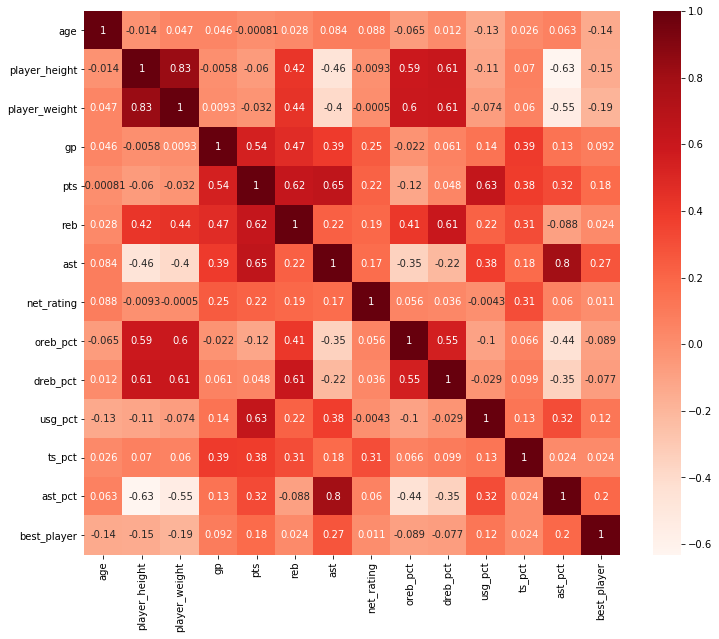

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dfNba.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor["best_player"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age              0.135671
player_height    0.146898
player_weight    0.186586
pts              0.181994
ast              0.274900
usg_pct          0.124123
ast_pct          0.195245
best_player      1.000000
Name: best_player, dtype: float64

In [10]:
# Menggunakan Feature Importance
X = dfNba.drop(["player_name", "team_abbreviation", "college", "net_rating", "draft_year", "draft_round", "draft_number", "country", "season", "best_player"],1)   #Feature Matrix
y = dfNba["best_player"]          #Target Variable
dfNba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [11]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000329
Best score using built-in LassoCV: 0.112651


In [12]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

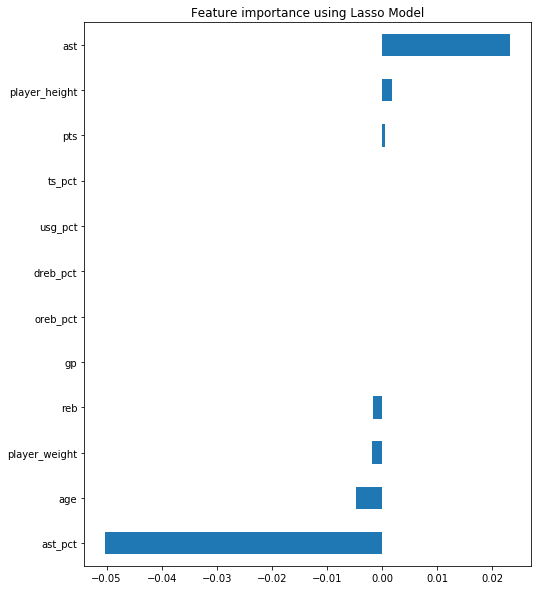

In [13]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [14]:
dfNbafeat = dfNba[['age', 'player_weight', 'player_height', 'reb', 'pts', 'ast_pct', 'ast', 'best_player']] 
dfNbafeat

,age,player_weight,player_height,reb,pts,ast_pct,ast,best_player
0,36.0,99.790240,198.12,16.1,5.7,0.113,3.1,0
1,28.0,117.933920,215.90,1.5,2.3,0.048,0.3,0
2,39.0,95.254320,205.74,1.0,0.8,0.148,0.4,0
3,24.0,100.697424,203.20,2.3,3.7,0.077,0.6,0
4,34.0,108.862080,205.74,2.4,2.4,0.040,0.2,0
...,...,...,...,...,...,...,...,...
11140,28.0,108.862080,208.28,5.4,9.1,0.064,1.1,0
11141,23.0,97.522280,195.58,0.3,1.2,0.033,0.1,0
11142,28.0,117.933920,213.36,5.1,6.1,0.076,1.1,0
11143,27.0,104.779752,208.28,3.0,2.1,0.056,0.4,0


### Standarisasi

In [17]:
stdscaler = StandardScaler()

datastdNba = pd.DataFrame(stdscaler.fit_transform(dfNbafeat.iloc[:,1:6]))
datastdNba

,0,1,2,3,4
0,-0.067402,-0.292998,5.025470,-0.408829,-0.190264
1,1.375352,1.641595,-0.825572,-0.981681,-0.874381
2,-0.428090,0.536113,-1.025951,-1.234410,0.178107
3,0.004736,0.259743,-0.504967,-0.745801,-0.569160
4,0.653975,0.536113,-0.464892,-0.964832,-0.958580
...,...,...,...,...,...
11140,0.653975,0.812484,0.737377,0.164023,-0.705983
11141,-0.247746,-0.569369,-1.306480,-1.167015,-1.032255
11142,1.375352,1.365225,0.617150,-0.341434,-0.579685
11143,0.329355,0.812484,-0.224438,-1.015378,-0.790182


#### Cek Outlier

In [18]:
dfZscoreNba = pd.DataFrame(datastdNba)
dfZscoreNba.head()

dfZscoreNba[(dfZscoreNba < -2.5) | (dfZscoreNba > 2.5)] = np.NaN
dfZscoreNba.isnull().sum()

0     89
1    120
2    334
3    253
4    249
dtype: int64

In [19]:
dfZscoreNba['best_player'] = dfNbafeat['best_player']
dfZscoreNba

,0,1,2,3,4,best_player
0,-0.067402,-0.292998,NaN,-0.408829,-0.190264,0
1,1.375352,1.641595,-0.825572,-0.981681,-0.874381,0
2,-0.428090,0.536113,-1.025951,-1.234410,0.178107,0
3,0.004736,0.259743,-0.504967,-0.745801,-0.569160,0
4,0.653975,0.536113,-0.464892,-0.964832,-0.958580,0
...,...,...,...,...,...,...
11140,0.653975,0.812484,0.737377,0.164023,-0.705983,0
11141,-0.247746,-0.569369,-1.306480,-1.167015,-1.032255,0
11142,1.375352,1.365225,0.617150,-0.341434,-0.579685,0
11143,0.329355,0.812484,-0.224438,-1.015378,-0.790182,0


In [20]:
dataBasketluar = dfZscoreNba.dropna()
dataBasketluar

,0,1,2,3,4,best_player
1,1.375352,1.641595,-0.825572,-0.981681,-0.874381,0
2,-0.428090,0.536113,-1.025951,-1.234410,0.178107,0
3,0.004736,0.259743,-0.504967,-0.745801,-0.569160,0
4,0.653975,0.536113,-0.464892,-0.964832,-0.958580,0
5,-0.247746,-0.016628,-0.344665,0.012386,-0.306038,0
...,...,...,...,...,...,...
11140,0.653975,0.812484,0.737377,0.164023,-0.705983,0
11141,-0.247746,-0.569369,-1.306480,-1.167015,-1.032255,0
11142,1.375352,1.365225,0.617150,-0.341434,-0.579685,0
11143,0.329355,0.812484,-0.224438,-1.015378,-0.790182,0


In [21]:
dataBasketluar.isnull().sum()

0              0
1              0
2              0
3              0
4              0
best_player    0
dtype: int64

## Data Visualisasi

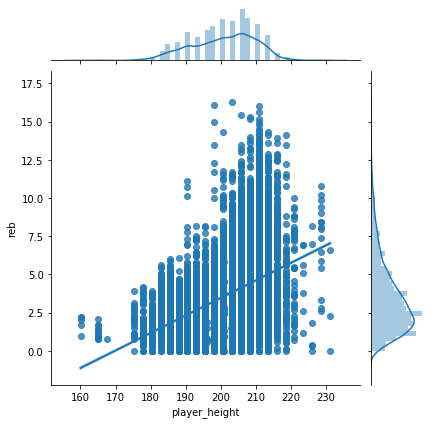

In [22]:
sns.jointplot(x=dfNbafeat['player_height'], y=dfNbafeat['reb'], kind='reg')

dapat dilihat bahwasanya korelasi antara Tinggi badan Pemain (player_height dengan Reb(rebound), sangat berkorelasi dikarenakan apabila pemain tersebut memiliki badan tinggi, kemungkinan melakukan rebound sangat banyak.

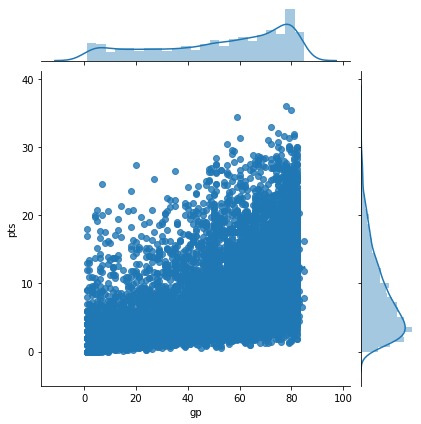

In [23]:
sns.jointplot(x=dfNba['gp'], y=dfNbafeat['pts'], kind='reg')

dapat dilihat gambar diatas, bahwasanya player yang semakin banyak mendapatkan point, kemungkinan akan dimainkan kembali juga besar, sehingga game played pemain tersebut tinggi.

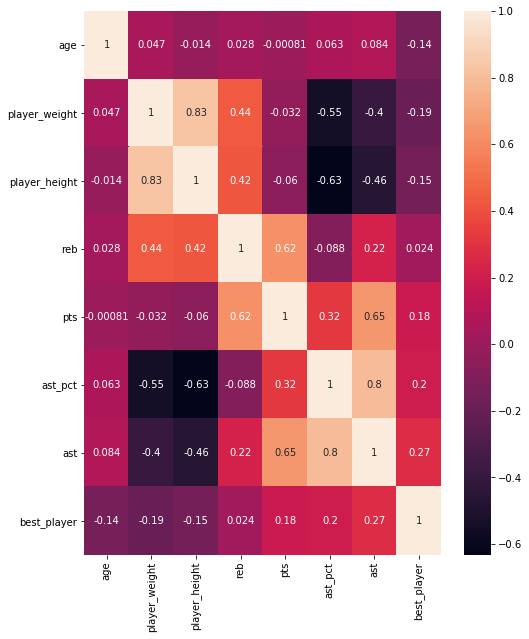

In [24]:
sns.heatmap(dfNbafeat.corr(), annot=True)

Dapat dilihat dari gambar di atas, bahwasanya dilihat dengan nilai korelasi yang mendekati angka 1 bahwa menyatakan terdapat korelasi antar feature, salah satunya nilai tertinggi yaitu 0.8 antara ast_pct dengan ast, assist yang dilakukan oleh player dapat menambahkan assist percetange (ast_pct).

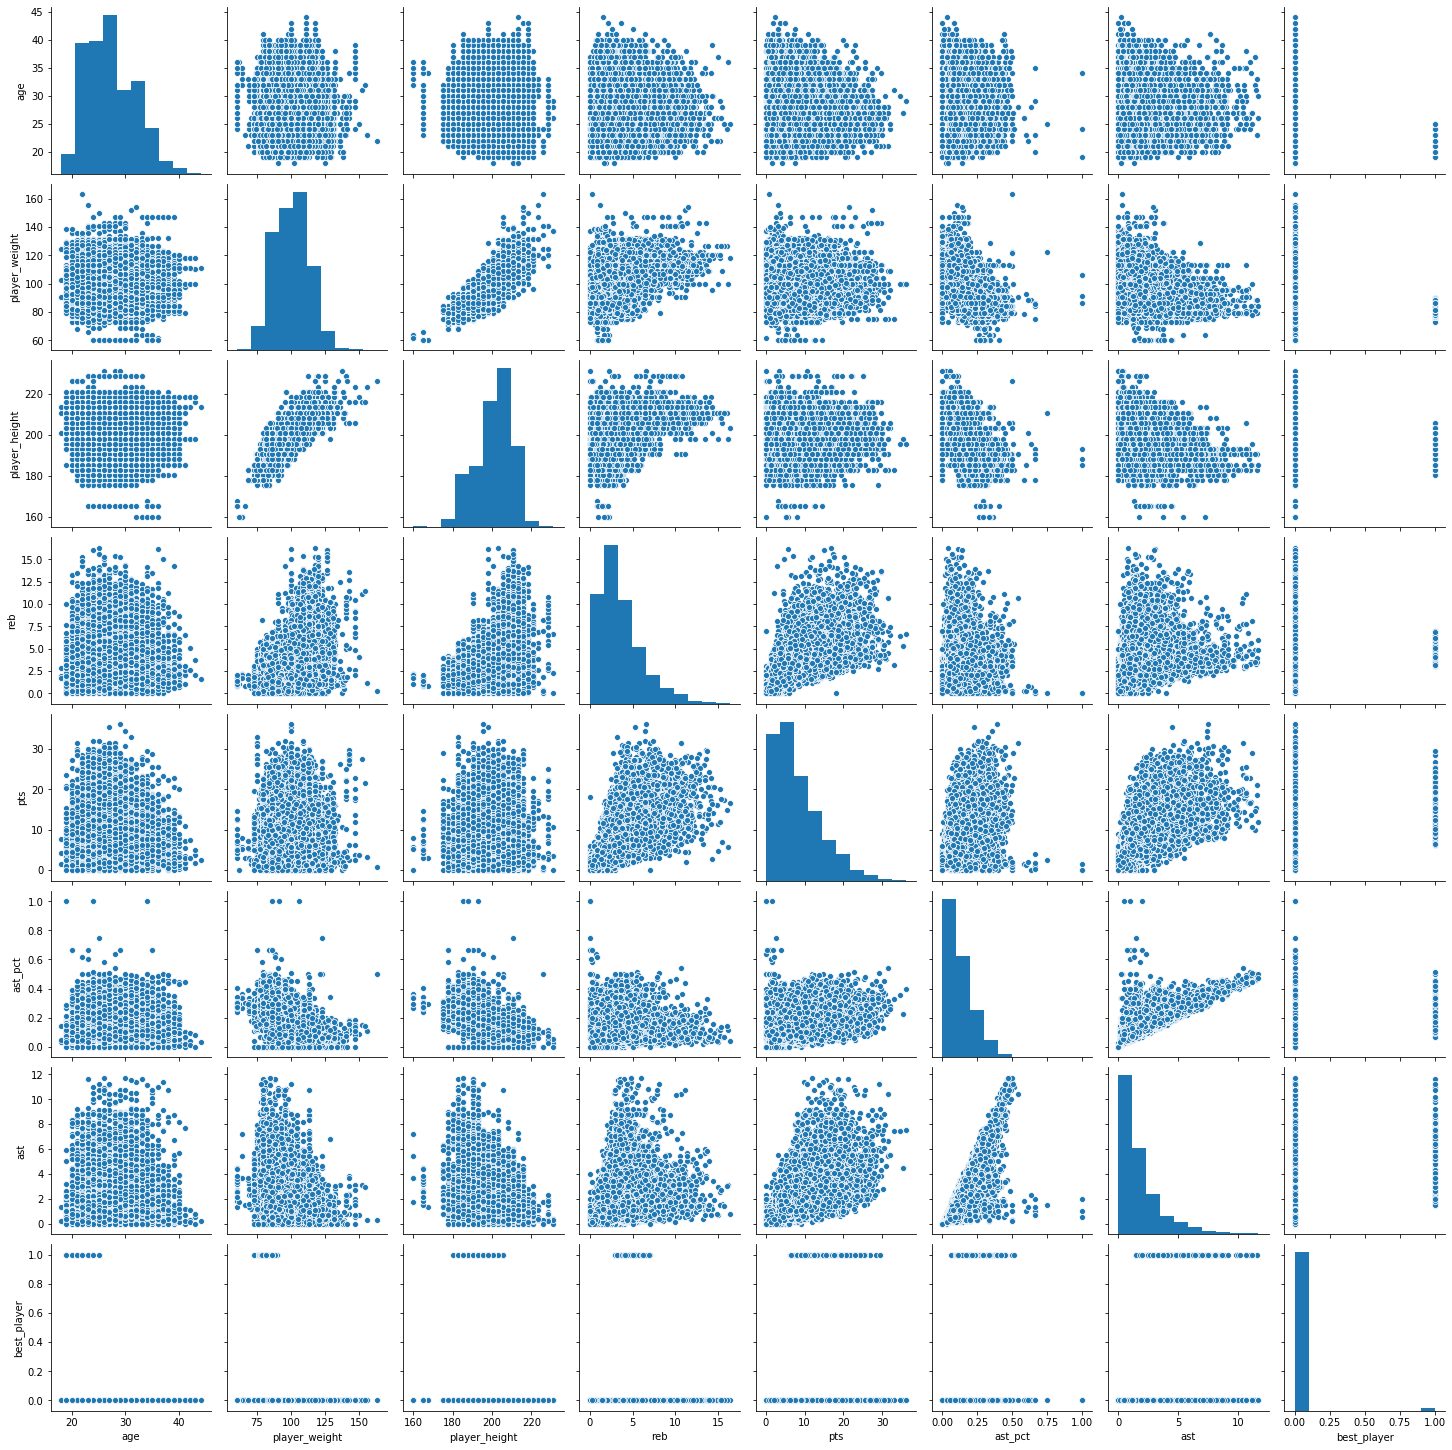

In [25]:
sns.pairplot(dfNbafeat)

dapat dilihat dari gambar diatas, sama seperti dengan gambar heatmap, bahwa korelasi antar ast dengan ast_pct sangat lah bagus.

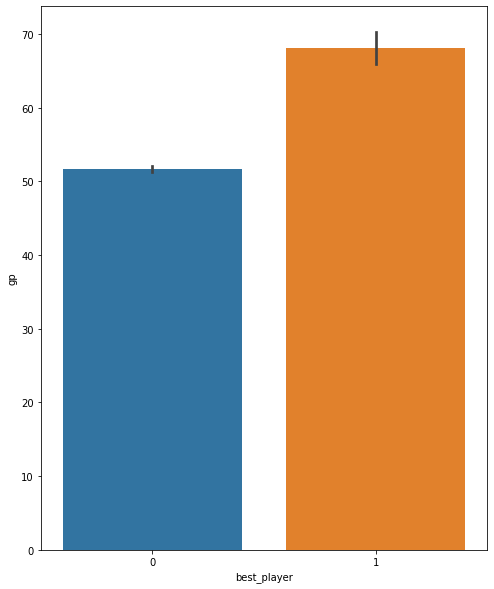

In [26]:
sns.barplot(x='best_player', y='gp', data=dfNba)

Dapat dilihat dari gambar di atas, bahwa player yang dimasukkan dalam golongan best player kemungkinan akan dimainkan sangat tinggi sehingga game played tersebut sangatlah tinggi.

## Training Dataset dan Test Dataset

In [32]:
A = dataBasketluar.drop('best_player', axis = 1)
b = dataBasketluar['best_player']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.22, random_state =101)

## Model

### Logistic Regresi

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# logreg_predictions = logreg.predict(xts)
# logreg_predictions

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
logreg.score(X_test,y_test)

0.9826820603907638

### Random Forest

In [37]:
rfModel = RandomForestClassifier(n_estimators=100)
rfModel.fit(X_train,y_train)
# len(rfModel.estimators_) #ada 100 estimators
# rfModel_predictions = rfModel.predict(xts)
# rfModel_predictions

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
rfModel.score(X_test, y_test)

0.9831261101243339

### K-Nearest Neighbors

In [42]:
## nilai K
k = round(X_train.shape[0] ** .5) + 1 
k
knnmodel = KNeighborsClassifier(n_neighbors=k)
knnmodel.fit(X_train,y_train)
# knnmodel_predictions = knnmodel.predict(xts)
# knnmodel_predictions

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=90, p=2,
                     weights='uniform')

In [44]:
knnmodel.score(X_test, y_test)

0.9809058614564832

In [45]:
print('Score: ')
print('Logistic Regression Score = {} \nRandom Forest Score = {} \nKNN Score = {} '
      .format(logreg.score(X_test, y_test),rfModel.score(X_test, y_test), knnmodel.score(X_test, y_test)))

Score: 
Logistic Regression Score = 0.9826820603907638 
Random Forest Score = 0.9831261101243339 
KNN Score = 0.9809058614564832 


### Cross Validation

In [47]:
rfModel_score = np.mean(cross_val_score(logreg, A, b, cv=5))
logreg_score = np.mean(cross_val_score(rfModel, A, b, cv=5))
knnmodel_score = np.mean(cross_val_score(knnmodel, A, b, cv=5))

print('Logistic Regression Score = {} \nRandom Forest Score = {} \nKNN Score = {} '
      .format(rfModel_score, logreg_score, knnmodel_score))

Logistic Regression Score = 0.9825109916951635 
Random Forest Score = 0.9800683927699072 
KNN Score = 0.9825109916951635 


### Hyper-Parameter Tunning

#### Logistic Regression

In [48]:
# param yang akan di tuned + nilai yang mungkin

penalty = ['l1','l2','elasticnet','none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {
    'penalty':penalty, 'solver':solver, 'max_iter':max_iter
}
param

# logreg.get_params()

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [49]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### Randomized Search CV

In [50]:
model = LogisticRegression()
modelrs = RandomizedSearchCV(
    estimator = model, param_distributions = param, cv = 5 
)

In [51]:
modelrs.fit(X_train,y_train)
modelrs.best_params_

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\mycom\Anaconda3\lib\site-p

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000}

In [52]:
modellogreg = LogisticRegression(
    solver='lbfgs', penalty='l2', max_iter=10
)
modellogreg.fit(X_train,y_train)
modellogreg.score(X_test, y_test)

C:\Users\mycom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9817939609236235

#### Random Forest

In [53]:
model = RandomForestClassifier()
#hyper parameters set
param = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
modelrs = RandomizedSearchCV(
    estimator = model, param_distributions = param, cv = 5 
)

In [56]:
modelrs.fit(X_train,y_train)
modelrs.best_params_

{'random_state': 123,
 'n_jobs': -1,
 'n_estimators': 20,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'criterion': 'gini'}

In [57]:
modelrf = RandomForestClassifier(
    random_state=123, n_jobs=-1, n_estimators=15, min_samples_split=5,min_samples_leaf=1,criterion='entropy'
)
modelrf.fit(X_train, y_train)
modelrf.score(X_test, y_test)

0.9835701598579041

#### K-Nearest Neighbors

In [60]:
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
param = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
modelrs = RandomizedSearchCV(
    estimator = model, param_distributions = param, cv = 5 
)


In [61]:
modelrs.fit(X_train,y_train)
modelrs.best_params_

{'weights': 'distance',
 'n_neighbors': 8,
 'n_jobs': -1,
 'leaf_size': 1,
 'algorithm': 'brute'}

In [63]:
modelknn = KNeighborsClassifier(
    weights='distance', n_neighbors=7,n_jobs=-1,leaf_size=2,algorithm='kd_tree'
)
modelknn.fit(X_train,y_train)
modelknn.score(X_test, y_test)

0.9813499111900533

In [73]:
print('Score before Tuning: ')
print('Logistic Regression Score = {} \nRandom Forest Score = {} \nKNN Score = {} '
      .format(logreg.score(X_test, y_test),rfModel.score(X_test, y_test), knnmodel.score(X_test, y_test)))

print('So score after Hyper-Parameter Tuning are: ')
print('Logistic Regression Score = {} \nRandom Forest Score = {} \nKNN Score = {} '
      .format(modellogreg.score(X_test, y_test), modelrf.score(X_test, y_test), modelknn.score(X_test, y_test)))



Score before Tuning: 
Logistic Regression Score = 0.9826820603907638 
Random Forest Score = 0.9831261101243339 
KNN Score = 0.9809058614564832 
So score after Hyper-Parameter Tuning are: 
Logistic Regression Score = 0.9817939609236235 
Random Forest Score = 0.9835701598579041 
KNN Score = 0.9813499111900533 


## Evaluation Metrics

In [69]:
datatest= X_test
datatest['test']= y_test
datatest.head(5)
X_test= X_test.drop('test', axis=1)

datatest['prediksi LogReg']=modellogreg.predict(X_test)
datatest['prediksi RandomForest']= modelrf.predict(X_test)
datatest['prediksi KNN']= modelknn.predict(X_test)
datatest.head(5)

,0,1,2,3,4,test,prediksi LogReg,prediksi RandomForest,prediksi KNN
9339,1.014663,1.365225,1.699192,0.720026,0.125483,0,0,0,0
3783,-1.149467,-1.951221,-0.424816,0.736875,1.872614,0,0,0,0
6956,-1.329811,-1.674851,-0.825572,-0.425677,1.367419,0,0,0,0
871,-0.788779,-1.122110,0.216394,0.399903,-0.063965,0,0,0,0
4275,-0.067402,-0.292998,-0.665270,-0.391980,-0.400762,0,0,0,0


### Logistic Regression

In [78]:

# Classification_report
print(classification_report(y_test, datatest['prediksi LogReg']))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2209
           1       0.62      0.12      0.20        43

    accuracy                           0.98      2252
   macro avg       0.80      0.56      0.59      2252
weighted avg       0.98      0.98      0.98      2252



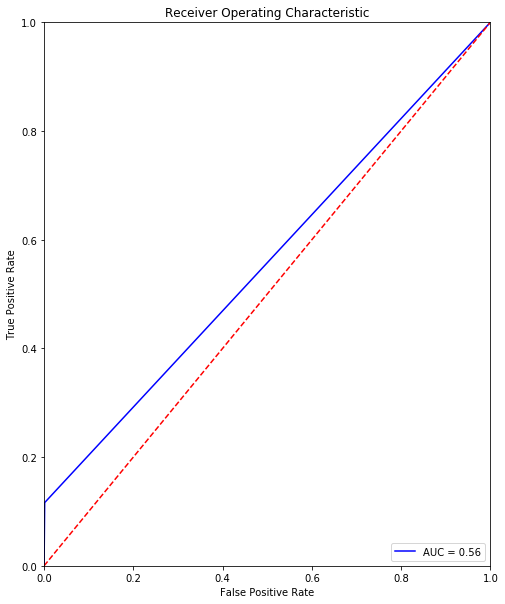

In [77]:
probs = modellogreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, datatest['prediksi LogReg'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [79]:
# Classification_report
print(classification_report(y_test, datatest['prediksi RandomForest']))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2209
           1       0.62      0.35      0.45        43

    accuracy                           0.98      2252
   macro avg       0.81      0.67      0.72      2252
weighted avg       0.98      0.98      0.98      2252



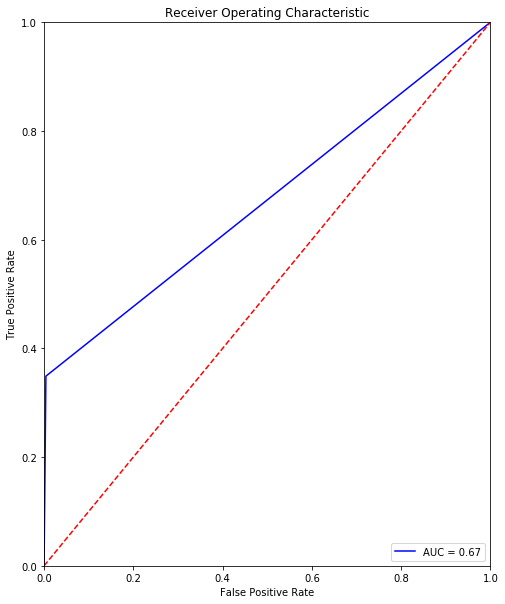

In [80]:
probs = modelrf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, datatest['prediksi RandomForest'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-Nearest Neighbors

In [81]:
# Classification_report
print(classification_report(y_test, datatest['prediksi KNN']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2209
           1       0.55      0.14      0.22        43

    accuracy                           0.98      2252
   macro avg       0.76      0.57      0.61      2252
weighted avg       0.98      0.98      0.98      2252



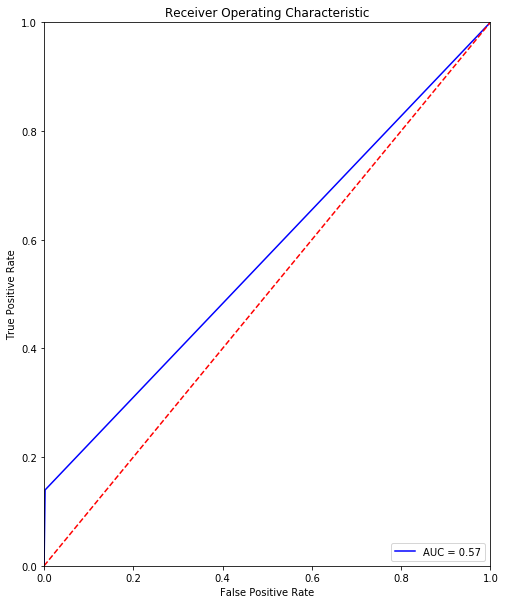

In [83]:
probs = modelknn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, datatest['prediksi KNN'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Test Oversampling atau Smote

In [88]:
dataBasketluar['best_player'].value_counts()

0    10056
1      179
Name: best_player, dtype: int64

In [90]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(A, b)

In [92]:
# Menggunakan Random Forest Oversampling

# Predict

modelrf.fit(X_resampled, y_resampled)
rfpred_Oversampling = modelrf.predict(X_test)

print(classification_report(y_test, rfpred_Oversampling))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2209
           1       1.00      1.00      1.00        43

    accuracy                           1.00      2252
   macro avg       1.00      1.00      1.00      2252
weighted avg       1.00      1.00      1.00      2252



## Setting Threshold

In [100]:
threshold1 = 0.5
threshold2 = 0.75
threshold3 = 0.80
predicted_proba = modelrf.predict_proba(X_test)
predicted1 = (predicted_proba [:,1] >= threshold1).astype('int')

accuracy = accuracy_score(y_test, predicted1)
print(classification_report(y_test, predicted1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2209
           1       1.00      1.00      1.00        43

    accuracy                           1.00      2252
   macro avg       1.00      1.00      1.00      2252
weighted avg       1.00      1.00      1.00      2252



In [101]:
predicted2 = (predicted_proba [:,1] >= threshold2).astype('int')

accuracy = accuracy_score(y_test, predicted2)
print(classification_report(y_test, predicted2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2209
           1       1.00      1.00      1.00        43

    accuracy                           1.00      2252
   macro avg       1.00      1.00      1.00      2252
weighted avg       1.00      1.00      1.00      2252



In [102]:
predicted3 = (predicted_proba [:,1] >= threshold3).astype('int')

accuracy = accuracy_score(y_test, predicted3)
print(classification_report(y_test, predicted3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2209
           1       1.00      1.00      1.00        43

    accuracy                           1.00      2252
   macro avg       1.00      1.00      1.00      2252
weighted avg       1.00      1.00      1.00      2252



## Pemain Indo rekrutmen

In [105]:
dfIbl = pd.read_csv('ibl_player.csv', index_col=0)
dfIbl

,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,2018,4,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,2015,6,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,2018,5,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,2018,2,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,2017,8,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237


In [106]:
dfIbl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10 non-null     object 
 1   club          10 non-null     object 
 2   country       10 non-null     object 
 3   age           10 non-null     int64  
 4   height        10 non-null     int64  
 5   weight        10 non-null     int64  
 6   pts           10 non-null     int64  
 7   reb           10 non-null     int64  
 8   gp            10 non-null     int64  
 9   draft_year    10 non-null     int64  
 10  draft_round   10 non-null     int64  
 11  draft_number  10 non-null     int64  
 12  ast           10 non-null     float64
 13  net_rating    10 non-null     float64
 14  oreb_pct      10 non-null     float64
 15  dreb_pct      10 non-null     float64
 16  usg_pct       10 non-null     float64
 17  ts_pct        10 non-null     float64
 18  ast_pct       10 non-null     flo

In [108]:
dfIblfeat = dfIbl[['age', 'weight', 'height', 'reb', 'pts', 'ast_pct', 'ast']]
dfIblfeat

,age,weight,height,reb,pts,ast_pct,ast
0,24,90,190,6,7,0.237,2.3
1,21,86,185,3,6,0.277,2.3
2,23,83,178,3,10,0.352,1.3
3,26,75,185,4,11,0.071,2.2
4,20,80,183,2,5,0.143,1.8
5,21,85,191,10,4,0.238,2.5
6,25,90,188,5,7,0.226,2.2
7,23,87,179,2,1,0.189,1.2
8,21,80,177,8,9,0.220,1.4
9,24,85,182,5,6,0.237,1.7


In [109]:
stdscaler = StandardScaler()

datastdIbl = pd.DataFrame(stdscaler.fit_transform(dfIblfeat.iloc[:,1:6]))
datastdIbl

,0,1,2,3,4
0,1.316322,1.329114,0.483494,0.142857,0.252815
1,0.423900,0.257248,-0.725241,-0.214286,0.814626
2,-0.245416,-1.243365,-0.725241,1.214286,1.868022
3,-2.030259,0.257248,-0.322329,1.571429,-2.078701
4,-0.914732,-0.171499,-1.128152,-0.571429,-1.067441
5,0.200795,1.543487,2.095140,-0.928571,0.266860
6,1.316322,0.900368,0.080582,0.142857,0.098317
7,0.647006,-1.028992,-1.128152,-2.000000,-0.421358
8,-0.914732,-1.457738,1.289317,0.857143,0.014045
9,0.200795,-0.385872,0.080582,-0.214286,0.252815


In [118]:
dfIbl['predict'] = modelrf.predict(datastdIbl)
dfIbl

,name,club,country,age,height,weight,pts,reb,gp,draft_year,...,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,predict,keterangan
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,...,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237,0,tidak kriteria
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,...,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277,0,tidak kriteria
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,...,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352,0,tidak kriteria
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,...,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071,0,tidak kriteria
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,...,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143,0,tidak kriteria
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,2018,...,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238,0,tidak kriteria
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,2015,...,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226,0,tidak kriteria
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,2018,...,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189,0,tidak kriteria
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,2018,...,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220,0,tidak kriteria
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,2017,...,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237,0,tidak kriteria


In [112]:
dfIbl['keterangan']=dfIbl.apply(lambda x: 'tidak kriteria' if (x['predict']== 0) else ' kriteria', axis=1)
dfIbl

,name,club,country,age,height,weight,pts,reb,gp,draft_year,...,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,predict,keterangan
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,...,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237,0,tidak kriteria
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,...,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277,0,tidak kriteria
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,...,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352,0,tidak kriteria
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,...,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071,0,tidak kriteria
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,...,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143,0,tidak kriteria
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,2018,...,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238,0,tidak kriteria
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,2015,...,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226,0,tidak kriteria
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,2018,...,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189,0,tidak kriteria
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,2018,...,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220,0,tidak kriteria
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,2017,...,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237,0,tidak kriteria
